Plots the KE spectrum along with raw and coarse grained field

In [1]:
import xarray as xr

Load in data

In [4]:
region = 'SO_JET'
directory = f"/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features_take2/{region}/coarsened_data/"
fn_vel = f"../../../production_take2/{region}/MINT_1d_00610101_00610130_grid_U_{region}.nc"
fn_vel_cg = f"MINT_1d_00610101_00610130_uo_cg_{region}.nc"
fn_ke_exp4 = f"ke_spectrum_exp4.nc"
fn_ke_exp16 = f"../ke_spectrum_exp16.nc"

ds_vel = xr.open_dataset(directory + fn_vel)
ds_vel_cg = xr.open_dataset(directory + fn_vel_cg)
ds_ke_exp4 = xr.open_dataset(directory + fn_ke_exp4)
ds_ke_exp16 = xr.open_dataset(directory + fn_ke_exp16)

In [5]:
E4_mean = ds_ke_exp4.E.mean(dim='t')
E16_mean = ds_ke_exp16.E.mean(dim='t')

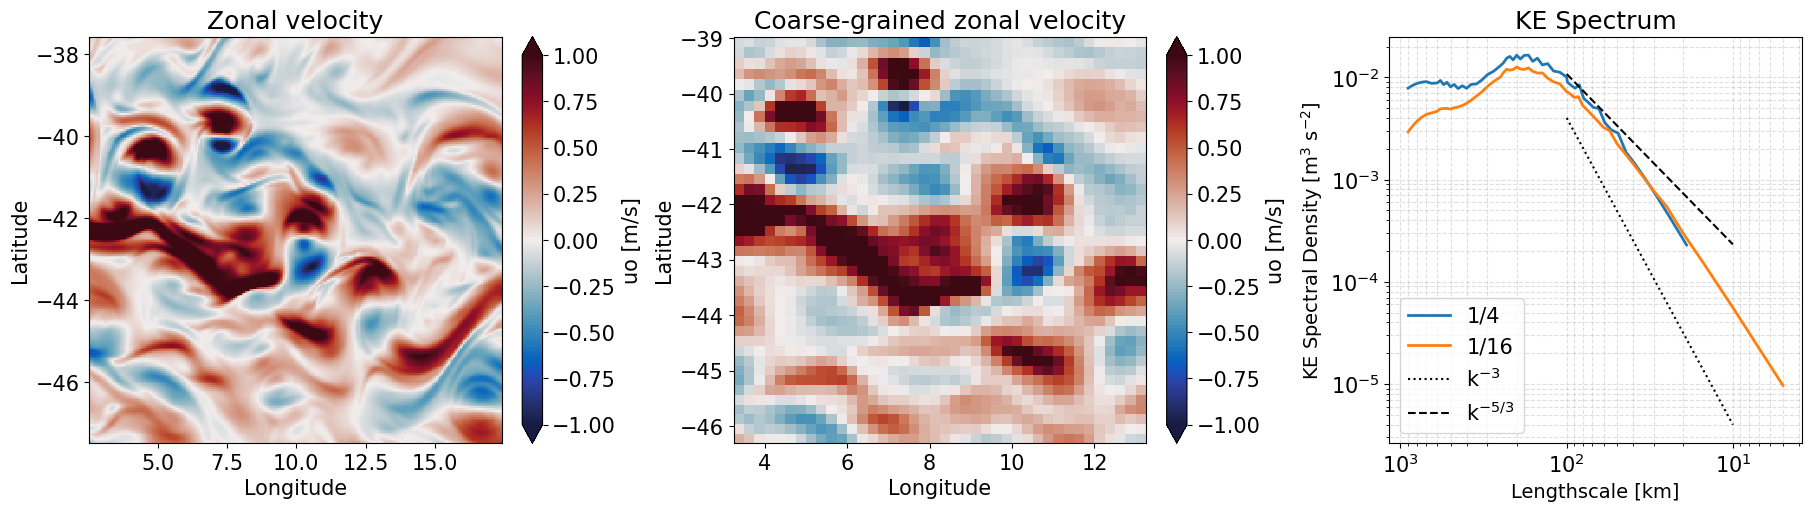

In [30]:
import matplotlib.pyplot as plt
import cmocean
import numpy as np

plt.rcParams.update({'font.size': 15})

# Select one snapshot for the velocity fields
u_raw = ds_vel.uo.isel(time_counter=0, depthu=0)
u_cg = ds_vel_cg.uo.isel(t=0, x_f=slice(3, 43), y_c=slice(7, 47))

fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Left panel: raw field
u_raw.plot(ax=axes[0], 
    x="nav_lon", y="nav_lat",
    vmin=-1, vmax=1,
    cmap=cmocean.cm.balance,
    cbar_kwargs={'label': "uo [m/s]"},
    extend='both', robust=True
)
axes[0].set_title("Zonal velocity")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Middle panel: coarse-grained field
u_cg.plot(ax=axes[1], 
          x="glamu", y="gphiu",
          vmin=-1, vmax=1,
          cmap=cmocean.cm.balance, 
          cbar_kwargs={'label': "uo [m/s]"},
          extend='both',
          robust=True)
axes[1].set_title("Coarse-grained zonal velocity")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# Right panel: KE spectra
axes[2].xaxis.set_inverted(True)
axes[2].loglog(1e-3*E4_mean["l"], E4_mean, label="E4_mean", lw=2)
axes[2].loglog(1e-3*E16_mean["l"], E16_mean, label="E16_mean", lw=2)

k_slope = np.linspace(100, 10, 74)*1e3 # pi/k to give meters/km
ke_slope3 = 4e-18 * k_slope**((3))
ke_slope53 = 5e-11 * k_slope**((5/3))
axes[2].loglog(1e-3*k_slope, ke_slope3, linestyle=":", color="k")
axes[2].loglog(1e-3*k_slope, ke_slope53, linestyle="--", color="k")


axes[2].set_xlabel("Lengthscale [km]", fontsize=14)
axes[2].set_ylabel("KE Spectral Density [m$^{3}$ s$^{-2}$]", fontsize=14)
axes[2].set_title("KE Spectrum")
axes[2].grid(True, which="both", ls="--", alpha=0.4)
axes[2].legend(['1/4', '1/16', 'k$^{-3}$', 'k$^{-5/3}$'])

plt.savefig(f"Figures/velocity_and_spectrum_{region}.png", dpi=300, bbox_inches='tight')